In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom as pdc

import os
import csv

In [2]:
def get_bb_info(patient_name, bb_info_file_name = '../data/stage_1_train_labels.csv'):
    rv = []
    with open(bb_info_file_name) as f:
        data = csv.reader(f)
        found = False
        for d in data:
            if d[0] == patient_name:
                found = True
                if d[1] != '':
                    rv.append([float(x) for x in d[1:-1]])
            else:
                if found:
                    # entries for a given patient are contiguous. If it is found then not found, no need to look further
                    return rv
    return rv

In [3]:
dir = '../data/stage_1_train_images'

In [4]:
# find the file name

all_files = [f for f in os.listdir(dir)]
img_nr = 95
file_name = all_files[img_nr]

# open the file
ds = pdc.dcmread(dir + '/' + file_name)

# display some of the meta info
print(file_name)
print(ds.Rows)
print(ds.Columns)
print(ds.PixelSpacing)
print(ds.PatientName)

3f34c48c-80e6-4a04-9351-6ad809760b70.dcm
1024
1024
['0.139', '0.139']
3f34c48c-80e6-4a04-9351-6ad809760b70


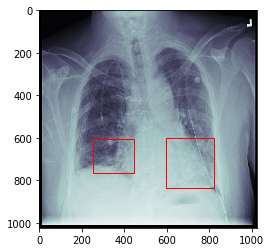

In [5]:
# plot the pixel data using matplotlib
fig, ax = plt.subplots(1)
for bb in get_bb_info(ds.PatientName):
    rect = patches.Rectangle((bb[0], bb[1]), bb[2], bb[3], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [6]:
get_bb_info(ds.PatientName)

[[251.0, 604.0, 193.0, 162.0], [598.0, 602.0, 223.0, 235.0]]